In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
df0 = pd.read_csv('datos.txt', skiprows=3, sep='\s+')

In [3]:
df0.head()

,DD/MM/AAAA,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,11/11/2018,266.0,276.0,6.42,32.9,13.5,42.0,873.5,0.0,205.2
1,12/11/2018,347.0,345.0,4.68,33.4,9.9,36.0,876.7,0.0,215.1
2,13/11/2018,89.0,111.0,19.46,63.8,7.6,30.0,881.6,0.0,215.3
3,14/11/2018,99.0,124.0,16.86,53.4,9.7,22.0,881.1,0.0,149.0
4,15/11/2018,112.0,134.0,5.57,26.4,11.4,27.0,876.5,0.0,207.6


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA'],1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,266.0,276.0,6.42,32.9,13.5,42.0,873.5,0.0,205.2,2018-11-11
1,347.0,345.0,4.68,33.4,9.9,36.0,876.7,0.0,215.1,2018-11-12
2,89.0,111.0,19.46,63.8,7.6,30.0,881.6,0.0,215.3,2018-11-13
3,99.0,124.0,16.86,53.4,9.7,22.0,881.1,0.0,149.0,2018-11-14
4,112.0,134.0,5.57,26.4,11.4,27.0,876.5,0.0,207.6,2018-11-15


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
count,83.000000,82.000000,82.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,219.865060,219.304878,8.369512,33.007692,10.715385,50.692308,874.980769,0.710256,158.160256
std,175.838823,96.458229,17.782548,10.633563,3.284401,16.275476,3.155579,2.192703,41.154752
min,0.000000,0.000000,0.220000,15.100000,0.900000,22.000000,867.200000,0.000000,35.300000
25%,120.500000,149.500000,2.350000,26.400000,9.225000,36.250000,873.175000,0.000000,131.400000
50%,220.000000,244.000000,4.385000,30.500000,11.400000,49.500000,875.500000,0.000000,171.700000
75%,254.000000,275.750000,7.337500,35.975000,13.275000,65.750000,877.350000,0.000000,188.025000
max,873.800000,360.000000,114.000000,63.800000,15.700000,83.000000,881.600000,11.800000,215.300000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       219.865060
DIRR       219.304878
VELS         8.369512
VELR        33.007692
TEMP        10.715385
HR          50.692308
PB         874.980769
PREC         0.710256
RAD-SOL    158.160256
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

10.715384615384611

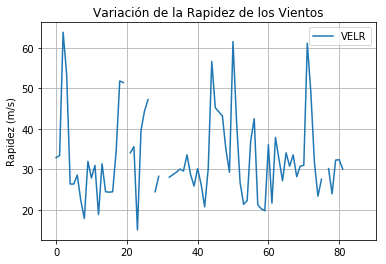

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

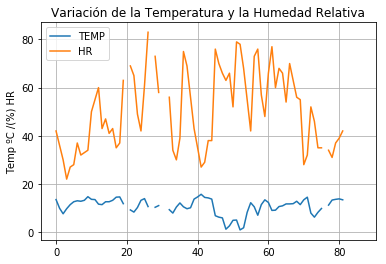

In [14]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

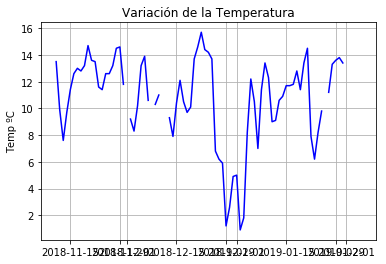

In [15]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()